## HMC

$f(x|\theta)~poisson$ 
$f(\theta)~gamma$ 

$f(\theta|x)~gamma$ <- we want to know( it is poropositional to $e^{-13\theta}\theta^{10}$)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

lambda_ =13
alpha = 11

In [54]:
#### oriignal distirbution
def posterior(x):
    return np.exp(-13*x)*np.power(x,alpha-1)
#### potential engergy(log)
def potential(x):
    return lambda_*x - (alpha-1)*np.log(x)
### diffrential of potential energy
def diff_potential(x):
    return lambda_ - (alpha-1)/x
#### leap-frog-method
def leap_frog(theta,_p,L,epsilon):
    for i in range(L):
        p_half = _p - epsilon*0.5*diff_potential(theta)
        theta = theta + epsilon * p_half
        _p = p_half - epsilon*0.5*diff_potential(theta)
    return (theta,_p)

        

In [130]:
### initial state
L = 100
T = 1000
epsilon = 0.01
theta1 = 3.0 
p = 0.0
answer=[]
######
for i in range(T):
    p = np.random.normal(0.1)
    theta_candidate,p_candidate = leap_frog(theta1,p,L,epsilon)
    ##print theta1,p
    ##print theta_candidate,p_candidate
    judge = np.random.uniform(0,1)
    judge2 = posterior(theta_candidate)*st.norm.pdf(p_candidate,0,1)
    judge3 = posterior(theta1)*st.norm.pdf(p,0,1)
    judge4 =  judge2/judge3
    ###print "a"
    if judge < judge4:
        theta1 = theta_candidate
        answer.append(theta_candidate)

1000
acceptance rate,1.000000
expectance 0.824754


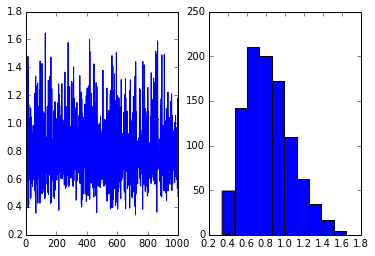

In [131]:
print len(answer)
print "acceptance rate,%f"%(len(answer)/(T*1.0))
print "expectance %f"%np.mean(answer)
plt.subplot(1,2,1)
plt.plot(answer)
plt.subplot(1,2,2)
plt.hist(answer)
plt.show()